In [1]:
import glob
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append("../../../")

from sklearn.svm import SVC

from helpers.assess import make_classification_report, make_confusion_matrix
from helpers.split import make_train_test_split, tag_label_feature_split

In [2]:
def svm_experiment(dataset):

    # load data and separate one hot encoded labels from features,
    # transform one hot encoded labels into label strings,
    # then encode label strings

    print(f"\n\nDataset: {dataset}\n")

    df = pd.read_pickle(dataset)
    _, (y, le), X = tag_label_feature_split(df, label_format="encoded")

    # divide into train and test data sets
    X_train_std, X_test_std, y_train, y_test = make_train_test_split(
        X, y, test_size=0.2, random_state=10, stratify=y, x_scaler="standard"
    )

    model = SVC()

    model.fit(X_train_std, y_train)

    predictions = model.predict(X_test_std)
    train_accuracy = model.score(X_train_std, y_train)
    test_accuracy = model.score(X_test_std, y_test)

    print(f"Train: {train_accuracy = :f}\n")
    make_classification_report(
        y_train,
        model=model,
        x=X_train_std,
        digits=4,
        label_encoder=le,
        print_report=True,
    )
    print(f"Test: {test_accuracy = :f}\n")
    make_classification_report(
        y_test, y_pred=predictions, digits=4, label_encoder=le, print_report=True
    )

    name = os.path.basename(dataset).split(".")[0]
    make_confusion_matrix(
        y_test,
        y_pred=predictions,
        label_encoder=le,
        title=f"{name} test (row normalized)",
    )

    return model



Dataset: ../../../datasets/dataset_01_mean.pickle

Train: train_accuracy = 0.577518



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classificat

                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     1.0000  0.0107    0.0212      374  0.1023
  genre_classical     0.7914  0.8737    0.8305     4221  0.7729
    genre_country     1.0000  0.0795    0.1473      327  0.2795
      genre_disco     0.0000  0.0000    0.0000      289  0.0000
     genre_hiphop     0.4879  0.3927    0.4352     1701  0.3828
       genre_jazz     0.5699  0.1741    0.2667     1241  0.2886
      genre_metal     0.8723  0.1233    0.2161      665  0.3205
        genre_pop     0.4474  0.7576    0.5626     4274  0.3904
     genre_reggae     0.6415  0.0431    0.0809      788  0.1583
       genre_rock     0.5856  0.5962    0.5909     3200  0.4956
                                                               
         accuracy                       0.5775    17080  0.4717
        macro avg     0.6396  0.3051    0.3151    17080        
     weighted avg     0.6119  0.5775    

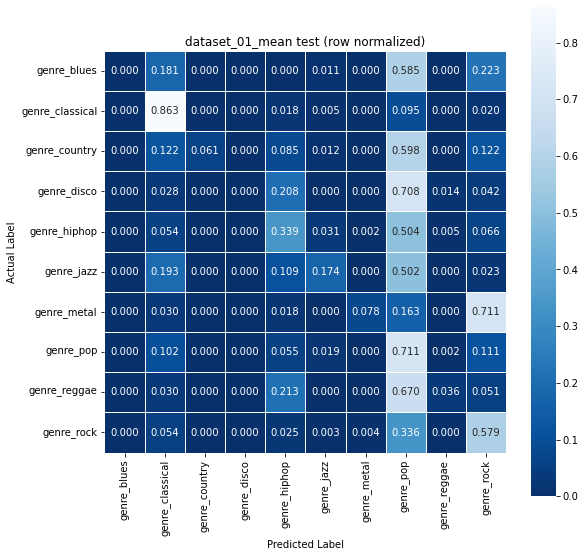



Dataset: ../../../datasets/dataset_02_mean_cov.pickle

Train: train_accuracy = 0.732787

                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     1.0000  0.0080    0.0159      374  0.0886
  genre_classical     0.8724  0.9251    0.8980     4221  0.8639
    genre_country     0.9912  0.3456    0.5125      327  0.5815
      genre_disco     0.8125  0.0450    0.0852      289  0.1889
     genre_hiphop     0.7279  0.7249    0.7264     1701  0.6962
       genre_jazz     0.8112  0.5504    0.6558     1241  0.6479
      genre_metal     0.9301  0.3203    0.4765      665  0.5371
        genre_pop     0.6139  0.8205    0.7023     4274  0.5952
     genre_reggae     0.8611  0.5977    0.7056      788  0.7066
       genre_rock     0.6892  0.7422    0.7147     3200  0.6466
                                                               
         accuracy                       0.7328    17080  0.6697
        macro

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


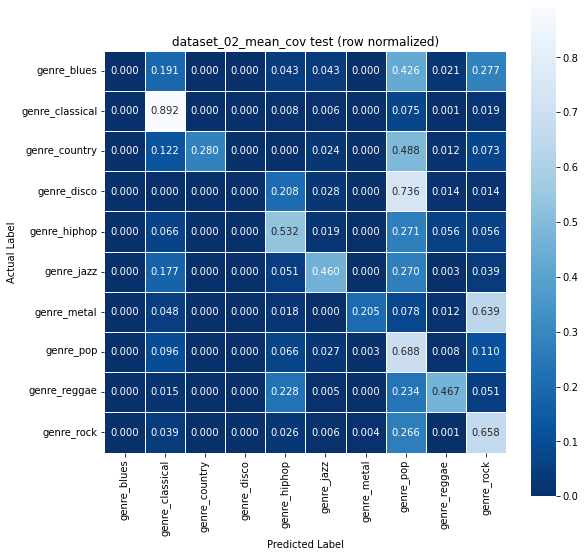



Dataset: ../../../datasets/dataset_03_mean_icov.pickle

Train: train_accuracy = 0.524356



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classificat

                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     1.0000  0.0027    0.0053      374  0.0511
  genre_classical     0.7434  0.8496    0.7929     4221  0.7218
    genre_country     0.0000  0.0000    0.0000      327  0.0000
      genre_disco     0.0000  0.0000    0.0000      289  0.0000
     genre_hiphop     0.4363  0.2316    0.3026     1701  0.2657
       genre_jazz     1.0000  0.0016    0.0032     1241  0.0387
      genre_metal     0.5000  0.0060    0.0119      665  0.0516
        genre_pop     0.3927  0.7157    0.5072     4274  0.3012
     genre_reggae     0.0000  0.0000    0.0000      788  0.0000
       genre_rock     0.5376  0.5969    0.5657     3200  0.4600
                                                               
         accuracy                       0.5244    17080  0.4004
        macro avg     0.4610  0.2404    0.2189    17080        
     weighted avg     0.5402  0.5244    

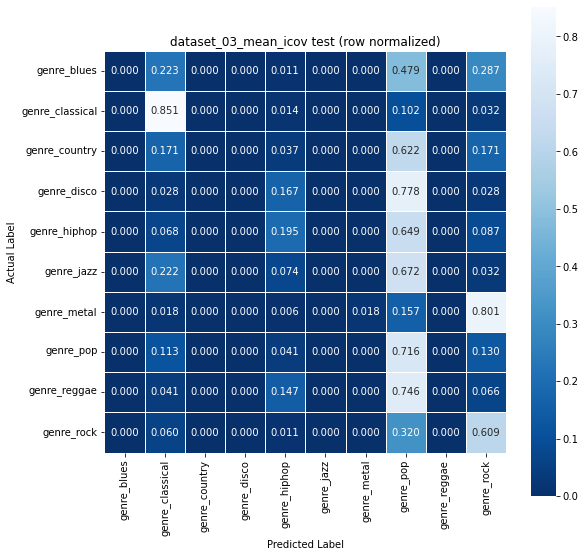



Dataset: ../../../datasets/dataset_04_mean_cov_icov.pickle

Train: train_accuracy = 0.674941



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classificat

                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.0000  0.0000    0.0000      374  0.0000
  genre_classical     0.8506  0.9038    0.8764     4221  0.8349
    genre_country     1.0000  0.2018    0.3359      327  0.4458
      genre_disco     0.0000  0.0000    0.0000      289  0.0000
     genre_hiphop     0.6461  0.6396    0.6428     1701  0.6036
       genre_jazz     0.7460  0.4496    0.5611     1241  0.5551
      genre_metal     0.8393  0.0707    0.1304      665  0.2373
        genre_pop     0.5546  0.7716    0.6453     4274  0.5135
     genre_reggae     0.7782  0.5254    0.6273      788  0.6257
       genre_rock     0.6294  0.7006    0.6631     3200  0.5816
                                                               
         accuracy                       0.6749    17080  0.5964
        macro avg     0.6044  0.4263    0.4482    17080        
     weighted avg     0.6732  0.6749    

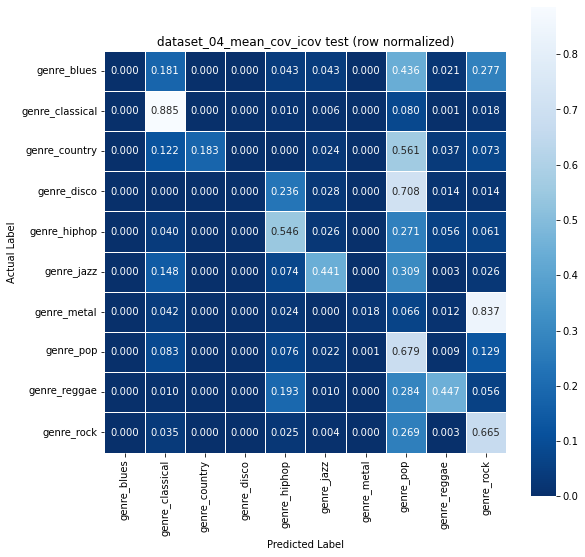



Dataset: ../../../datasets/dataset_05_pvtt.pickle

Train: train_accuracy = 0.530855



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classificat

                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.0000  0.0000    0.0000      374  0.0000
  genre_classical     0.8216  0.8600    0.8404     4221  0.7867
    genre_country     0.0000  0.0000    0.0000      327  0.0000
      genre_disco     0.0000  0.0000    0.0000      289  0.0000
     genre_hiphop     0.4357  0.1652    0.2396     1701  0.2223
       genre_jazz     0.4984  0.1265    0.2018     1241  0.2248
      genre_metal     0.0000  0.0000    0.0000      665  0.0000
        genre_pop     0.3814  0.7429    0.5040     4274  0.2952
     genre_reggae     0.0000  0.0000    0.0000      788  0.0000
       genre_rock     0.5401  0.5700    0.5547     3200  0.4488
                                                               
         accuracy                       0.5309    17080  0.4130
        macro avg     0.2677  0.2465    0.2340    17080        
     weighted avg     0.4793  0.5309    

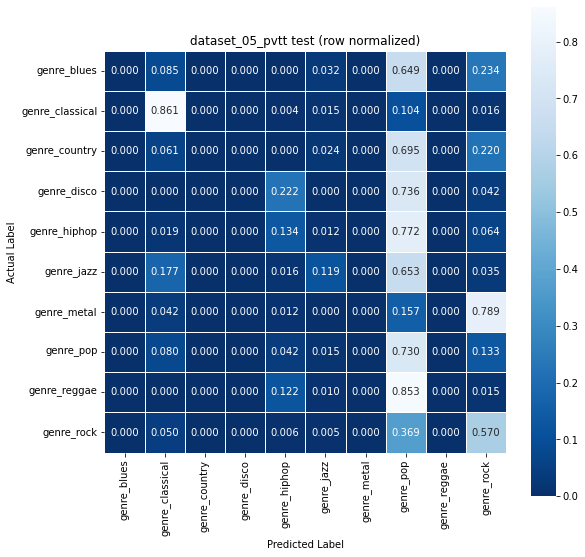



Dataset: ../../../datasets/dataset_06_pvtt_mean.pickle

Train: train_accuracy = 0.619321

                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     1.0000  0.0053    0.0106      374  0.0723
  genre_classical     0.8452  0.8936    0.8687     4221  0.8246
    genre_country     0.9583  0.0703    0.1311      327  0.2571
      genre_disco     1.0000  0.0104    0.0205      289  0.1010
     genre_hiphop     0.5582  0.5556    0.5569     1701  0.5080
       genre_jazz     0.6549  0.3151    0.4255     1241  0.4269
      genre_metal     1.0000  0.0526    0.1000      665  0.2251
        genre_pop     0.4862  0.7480    0.5893     4274  0.4310
     genre_reggae     0.6062  0.2716    0.3751      788  0.3879
       genre_rock     0.5987  0.6238    0.6110     3200  0.5192
                                                               
         accuracy                       0.6193    17080  0.5260
        macr

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


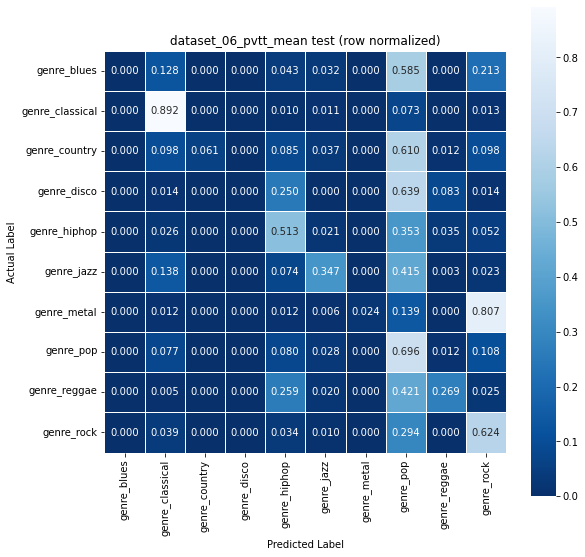



Dataset: ../../../datasets/dataset_07_pvtt_mean_cov.pickle

Train: train_accuracy = 0.741511

                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     1.0000  0.0080    0.0159      374  0.0886
  genre_classical     0.8904  0.9299    0.9097     4221  0.8796
    genre_country     0.9916  0.3609    0.5291      327  0.5944
      genre_disco     0.9545  0.0727    0.1350      289  0.2611
     genre_hiphop     0.7513  0.7425    0.7469     1701  0.7191
       genre_jazz     0.7964  0.5737    0.6670     1241  0.6553
      genre_metal     0.9437  0.3278    0.4866      665  0.5477
        genre_pop     0.6208  0.8271    0.7093     4274  0.6050
     genre_reggae     0.8549  0.6129    0.7140      788  0.7131
       genre_rock     0.6893  0.7459    0.7165     3200  0.6487
                                                               
         accuracy                       0.7415    17080  0.6809
        

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


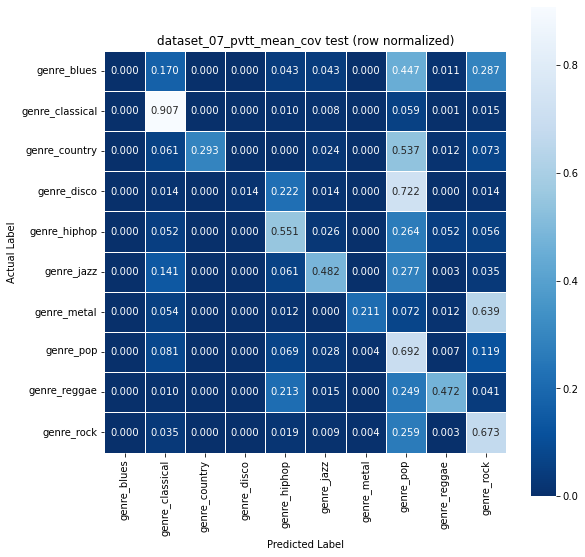



Dataset: ../../../datasets/dataset_08_pvtt_mean_icov.pickle

Train: train_accuracy = 0.566686



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classificat

                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     1.0000  0.0027    0.0053      374  0.0511
  genre_classical     0.8270  0.8666    0.8464     4221  0.7947
    genre_country     0.0000  0.0000    0.0000      327  0.0000
      genre_disco     0.0000  0.0000    0.0000      289  0.0000
     genre_hiphop     0.4830  0.4168    0.4475     1701  0.3926
       genre_jazz     0.6726  0.1209    0.2049     1241  0.2659
      genre_metal     1.0000  0.0015    0.0030      665  0.0380
        genre_pop     0.4256  0.7431    0.5412     4274  0.3567
     genre_reggae     0.0000  0.0000    0.0000      788  0.0000
       genre_rock     0.5665  0.6200    0.5921     3200  0.4935
                                                               
         accuracy                       0.5667    17080  0.4581
        macro avg     0.4975  0.2772    0.2640    17080        
     weighted avg     0.5748  0.5667    

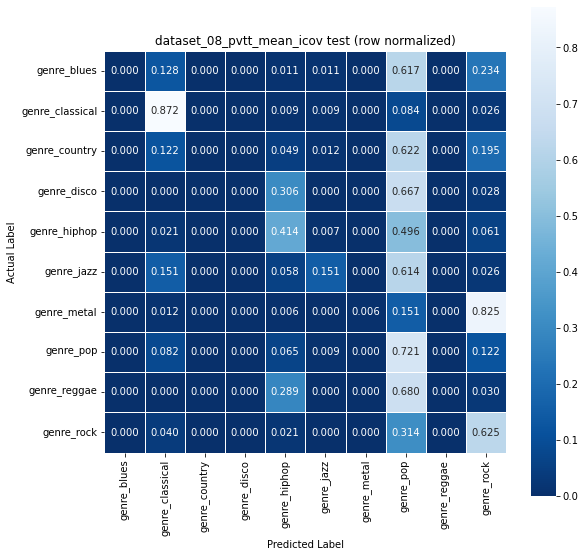



Dataset: ../../../datasets/dataset_09_pvtt_mean_cov_icov.pickle

Train: train_accuracy = 0.684251



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classificat

                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.0000  0.0000    0.0000      374  0.0000
  genre_classical     0.8654  0.9078    0.8861     4221  0.8480
    genre_country     1.0000  0.1865    0.3144      327  0.4285
      genre_disco     0.0000  0.0000    0.0000      289  0.0000
     genre_hiphop     0.6609  0.6543    0.6576     1701  0.6200
       genre_jazz     0.7475  0.4795    0.5842     1241  0.5748
      genre_metal     0.8519  0.0692    0.1280      665  0.2367
        genre_pop     0.5658  0.7817    0.6564     4274  0.5296
     genre_reggae     0.7845  0.5406    0.6401      788  0.6378
       genre_rock     0.6298  0.7103    0.6676     3200  0.5869
                                                               
         accuracy                       0.6843    17080  0.6083
        macro avg     0.6106  0.4330    0.4535    17080        
     weighted avg     0.6821  0.6843    

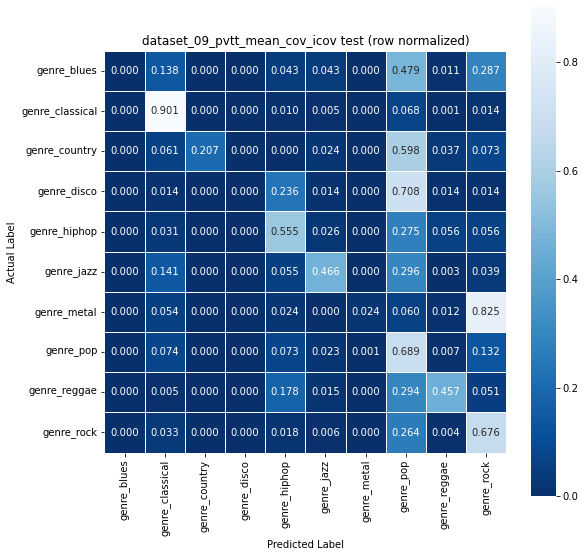



Dataset: ../../../datasets/dataset_10_melspecs_flattened.pickle



In [ ]:
dataset_folder = "../../../datasets/"
datasets = sorted([name for name in glob.glob(dataset_folder + "dataset_*.pickle")])
for dataset in datasets:
    svm_experiment(dataset)